In [1]:
#!/usr/bin/env python
# coding: utf-8

In[1]:

 Print multiple output per cell

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In[2]:

 Importing libraries

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In[3]:

 Pandas Display options

In [4]:
pd.set_option('display.max_columns',0)
pd.set_option('display.max_colwidth',0)

## Read data

In[4]:

 Reading relevant data

In [5]:
match_lvl_data = pd.read_csv('664389efa0868_match_level_scorecard.csv')
batsman_lvl_data = pd.read_csv('663e2b548c98c_batsman_level_scorecard.csv')
bowler_lvl_data = pd.read_csv('663e2b2c60743_bowler_level_scorecard.csv')
train_data = pd.read_csv('663e2b6d54457_train_data_with_samplefeatures.csv')
test_data = pd.read_csv('6644a1e287df6_test_data_with_samplefeatures (1).csv')

Printing shape and sample rows of each dataset

In[5]:

In [6]:
match_lvl_data.shape
match_lvl_data.head(2)

(1689, 30)

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,umpire1,umpire2,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,2021-01-01,night match,Sr Sh,2020/21,17681,Dn Mw,TJ Pe,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0:3834305.0:3776849.0:6718340.0:3566240.0:4950364.0:7543647.0,18570,2653993.0:6718326.0:6718382.0:2486896.0:2288789.0:4950224.0:8187878.0:3083667.0:4950294.0:6718396.0:1585464.0,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,2021-01-01,night match,Bg Bh Le,2020/21,6663,D Tr,PJ Ge,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1594319.0:7534687.0:7537067.0:1905847.0:8339701.0:7620346.0,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652.0:5788320.0:1612610.0:5509524.0:5497274.0:3876613.0:8193310.0,other_domestic,33963,1749075.0


In[6]:

In [7]:
batsman_lvl_data.shape
batsman_lvl_data.head(2)

(24483, 21)

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,wicket kind,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
0,8638034,KD Ce,7907451.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,7,5,1.1,caught,JS Nm,TM Jn,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,140.0,1.0,NaN,2021-01-01
1,8638034,TL St,4381761.0,NZ:Right-hand bat:None:,0.0,1.0,1,46,46,1.2,caught,R Ra,MG Bl,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,0.0,0.0,100.0,4.0,1.0,2021-01-01


In[7]:

In [8]:
bowler_lvl_data.shape
bowler_lvl_data.head(2)

(18539, 18)

,match id,bowler,bowler_id,bowler_details,is_bowler_captain,is_bowler_keeper,inning,runs,wicket_count,balls_bowled,economy,maiden,dots,Fours,Sixes,wides,noballs,match_dt
0,8638034,BV Ss,6718396.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,21,0,12,10.5,0,3.0,1,1,3,1,2021-01-01
1,8638034,HK Bt,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1,34,1,24,8.5,0,7.0,3,1,2,0,2021-01-01


In[8]:

In [9]:
train_data.shape
train_data.head(2)

(948, 23)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000


In[9]:

In [10]:
test_data.shape
test_data.head(2)

(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


In[10]:

 Creating a binary winner column - 0 if team1 wins, else 1

In [11]:
train_data['winner_01'] = train_data.apply(lambda x: 0 if (x['team1']==x['winner']) else 1, axis=1)

## Code to plot RnP

In[11]:

In [12]:
from matplotlib import pyplot as plt
plt.style.use('seaborn');
import re

C:\Users\aruna\AppData\Local\Temp\ipykernel_8412\3395773645.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


In [13]:
def createRnP(X_12, feature, N=5, ylim_lb=0.3, ylim_ub=0.7):
    '''
    Rank and Plot of input feature on the input data. The y-axis shows %team1 wins in each bucket.
    
    Parameters-
    1. X_12: dataset to build the RnP on. 
    2. feature: Feature to build RnP of.
    3. N: number of bins on x-axis. Default 5.
    4. ylim_lb: lower bound of y axis on plot.
    5. ylim_ub: upper bound of y axis on plot.
    
    Output-
    1. Rank and Plot
    
    Returns- None
    '''
    df = X_12.copy()
    df[f'{feature}_bin'] = df[feature].rank(pct=True)//(1/N) # divide feature values for all games in 5 equi-volume buckets.
    df['count'] = 1
    df['team1_win%'] = df['winner_01'].apply(lambda x: 1-x) # invert winner_01 to get team1 winner indicator
    df['team2_win%'] = df['winner_01'].copy()
    df[f'{feature}_min'] = df[feature].copy()
    df[f'{feature}_max'] = df[feature].copy()
    df_g = df.groupby(f'{feature}_bin').agg({'team1_win%':'mean', 'team2_win%':'mean', 'count':'sum', f'{feature}_min':'min',\
                                            f'{feature}_max':'max'}).reset_index()
    N = min(N,df_g.shape[0])
    blue_bar = df_g['team1_win%'].values.tolist()
    ind = np.arange(N)
    # plotting starts
    plt.figure(figsize=(10,5));
    plt.bar(ind, blue_bar, label='Team 1 win%');
    plt.axhline(y=0.5, linewidth=0.5, color='k', linestyle = '--')
    xlabel = re.sub('team_','ratio_',feature)
    plt.xlabel(f'{xlabel} (team1 / team2) bins');
    plt.ylabel('Win %');
    plt.title(f'RnP - {feature} vs win');
    df_g['xticks'] = df_g.apply(lambda x: str(round(x[f'{feature}_min'],2)) + ' - ' + str(round(x[f'{feature}_max'],2)), axis=1)
    plt.xticks(ind, df_g['xticks']);
    plt.ylim([ylim_lb,ylim_ub]);
    plt.legend(loc='best');
    x2,x1 = blue_bar[-1],blue_bar[0]
    slope = x2/x1
    if slope < 1:
        slope = 1/slope
        x1,x2 = x2,x1
    print('slope:', round(x2,2),'/',round(x1,2), '= ',round(slope,2))
    plt.show();

#### Helper function

In[12]:

In [14]:
def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl):
    '''
    Function to get last n games stats of a player before an input date.
    
    Input-
    1. player_id: id of the player to get historical data.
    2. date: date to look-back and get n games. Stats returned are before this input date.
    3. n: Number of historical games stats to return.
    4. bat_or_bowl: Kind of stats to return. {'bat': batting stats to return, 'bowl': bowling stats to return}
    
    Output-None
    
    Returns- dataframe having bowling/batting stats from last n games of a player before an input date. 
    The results are sorted by date.
    '''
    if bat_or_bowl == 'bat':
        df_topick = batsman_lvl_data
        id_col = 'batsman_id'
    else:
        df_topick = bowler_lvl_data
        id_col = 'bowler_id'
        
    return df_topick[(df_topick['match_dt']<date)&(df_topick[id_col]==float(player_id))]\
                .sort_values(by='match_dt', ascending=False).head(n)

## Feature creation

### 1. team_count_50runs_last15 <br><br>
Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games

In[13]:

In [15]:
def no50sLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['gte_50runs'] = np.where(df_rel['runs']>=50, 1, 0) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['gte_50runs']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In[14]:

Computing number of 50 runs in last 15 games for team1 for train dataset.

In [16]:
train_data['team1_count_50runs_last15'] = train_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['team2_count_50runs_last15'] = train_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:19<00:00, 48.91it/s]


In[15]:

Taking ratio of (number of 50 runs in last 15 games for team1) to (number of 50 runs in last 15 games for team2). Adding 1 to handle divide by zero exceptions.

In [17]:
train_data['team_count_50runs_last15'] = (train_data['team1_count_50runs_last15']+1)/(train_data['team2_count_50runs_last15']+1)
train_data.drop(columns=['team1_count_50runs_last15','team2_count_50runs_last15'], inplace=True) # dropping intermediate columns

In[16]:

In [18]:
train_data.shape
train_data.tail(10)

(948, 24)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,winner_01
938,9128433,Mi Is,30435,238727.0:5043310.0:7494668.0:3125562.0:8191868.0:1613926.0:5788320.0:3696482.0:3214812.0:4377694.0:5126050.0,Ka Kt Rs,30400,1945425.0:5959834.0:4497646.0:2083409.0:4231702.0:1934099.0:3429236.0:1613919.0:8130436.0:2632825.0:7758638.0,Ka Kt Rs,30400,Ka Kt Rs,field,Ma Ct An Sm Pe,Pune,2022-04-06,night match,In Pr Le,2022,18752,0.750000,1.000000,157.333333,50.00,171.750000,1
939,8950815,Si La,69,7200598.0:2420760.0:5490582.0:4771780.0:2104409.0:3061225.0:4365878.0:3865077.0:2590293.0:5490638.0:4403573.0,Ia,55,2981614.0:238727.0:4497646.0:3479860.0:5959834.0:1642738.0:2733380.0:3914658.0:8228100.0:6586824.0:4859490.0,Ia,55,Si La,bat,Hl Ph Ct An Sm Da,Dharamsala,2022-02-27,night match,Si La tr of Ia,2021/22,13453,0.600000,0.207921,143.866667,40.00,184.500000,1
940,9837288,Bn,769,9111213.0:8204881.0:7655479.0:6751660.0:8991737.0:7655437.0:5763386.0:8520931.0:9413816.0:4975382.0:4153085.0,On,272,8937046.0:9818213.0:6694246.0:6565684.0:6584164.0:6219968.0:293901.0:7541183.0:3057256.0:4772620.0:4095594.0,On,272,Bn,bat,Tn Uy Il Ct Gd Kr,Kirtipur,2023-11-03,day match,On tr of Nl,2023/24,13586,0.500000,1.650488,160.000000,0.00,150.750000,1
941,9457643,Ka Ts,42573,3849663.0:2123974.0:4069666.0:8129680.0:4403426.0:2614779.0:4403503.0:4731628.0:2436356.0:2436776.0:6931140.0,St Ss,45072,6930230.0:4403419.0:4879426.0:392216.0:3471761.0:2464349.0:392062.0:1594319.0:2036649.0:7976653.0:2104346.0,St Ss,45072,Ka Ts,bat,Se Ba Nl Sm Mr,Dhaka,2023-02-08,day/night match,Bh Pr Le,2022/23,14188,0.555556,0.344262,168.133333,66.67,154.400000,1
942,9272486,Ae Ss,33914,4239038.0:5492318.0:2286472.0:3681957.0:387778.0:8415854.0:7455818.0:4992378.0:5554254.0:5863290.0:55299.0,Ph Ss,33935,313809.0:1762060.0:5459516.0:4635658.0:7869994.0:3501889.0:3535853.0:5419574.0:3216569.0:1907352.0:8339701.0,Ph Ss,33935,Ae Ss,bat,Ph Sm,Perth,2022-12-26,night match,Bg Bh Le,2022/23,23841,1.153846,0.753086,165.400000,0.00,143.230769,1
943,9128601,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044.0:5053082.0:2035102.0:3851518.0:7453697.0:7881845.0:3068547.0,Ci Sr Ks,30414,7422673.0:249087.0:3519011.0:5001170.0:232000.0:1642738.0:196580.0:2294823.0:360086.0:7879829.0:7968225.0,Pb Ks,30407,Ci Sr Ks,field,We Sm Mi,Mumbai,2022-04-25,night match,In Pr Le,2022,5004,0.823529,1.000000,147.333333,66.67,166.400000,0
944,9433241,Mx,8700,4421689.0:7752989.0:1941743.0:4489722.0:7672874.0:4005406.0:7671166.0:4489708.0:8820538.0:2593758.0:3590362.0,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:6320362.0:2535420.0:5288226.0:3252395.0:334963.0:2850868.0:55299.0,St,9701,St,field,Te Cr As Cy Gd Tn,Taunton,2023-06-02,day/night match,Vy Bt,2023,1042,1.571429,0.012346,167.400000,0.00,170.466667,1
945,9097227,Bd,22497,4239773.0:1941743.0:3007969.0:4172972.0:1556253.0:3845029.0:2625895.0:3062555.0:4175772.0:6639156.0:4874092.0,Wn Pe,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138.0:2204950.0:1858961.0:6640164.0:2659502.0:4159658.0:4239493.0,Wn Pe,23869,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,2022-02-07,day match,CA T0 Ce,2021/22,1224,3.000000,1.000000,NaN,0.00,NaN,1
946,9516695,Rn Rs,30428,8058959.0:2162782.0:2981614.0:4690188.0:2125696.0:8228429.0:184960.0:3068547.0:3696482.0:8445478.0:3011735.0:6347494.0,Ss Hd,36014,5958840.0:7491294.0:3127354.0:3057312.0:4203499.0:5764576.0:8228408.0:4874820.0:8766603.0:7570107.0:2282125.0:5618038.0,Ss Hd,36014,Rn Rs,bat,Si Mh Sm Jr,Jaipur,2023-05-07,night match,In Pr Le,2023,4661,0.789474,1.487805,182.800000,66.67,133.375000,1
947,9433633,He,7727,4223883.0:2076192.0:8822729.0:5241564.0:2020332.0:3162487.0:1482249.0:1482998.0:2173688.0:5788418.0:8833075.0,Ge,7608,4898074.0:3220566.0:8048074.0:6988596.0:8072945.0:2667027.0:6341796.0:3

In[17]:

RnP of team_count_50runs_last15 computed over the train data. Slope denotes ratio of right most bin to left most bin.

In [19]:
#createRnP(train_data, 'team_count_50runs_last15')

In[19]:

 Doing similar process for test dataset

In [20]:
test_data['team1_count_50runs_last15'] = test_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team2_count_50runs_last15'] = test_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team_count_50runs_last15'] = (test_data['team1_count_50runs_last15'])/(test_data['team2_count_50runs_last15']+1)
test_data.drop(columns=['team1_count_50runs_last15','team2_count_50runs_last15'], inplace=True)
test_data.shape
test_data.head(2)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:05<00:00, 47.35it/s]


(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


### 2. team_winp_last5 <br><br>
<br>
Ratio of team1's win % to team2's win % in last 5 games

In[20]:

In [21]:
def winpLastn(team_id, date, n):
    '''
    Get a team's win % in last n games. If a team has won 3 game out of their last 5, win% is 60%.
    
    Input-
    1. team_id: ID of the team to get their last n games and winner information from those games.
    2. date: match date from which to get last n historical games.
    3. n: look-back window of games.
    
    Output- None
    
    Returns- Float value denoting win% of the team in last n games.
    '''
    # filter out games with either team1/2_id as input team id, match_dt being before current game's date, sort desc by date, and get top n rows (games)
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1_id']==team_id)|(match_lvl_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n) 
    win_count = df_rel[df_rel['winner_id']==team_id].shape[0] # count number of rows having winner as the input team
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return win% rounded to two decimal points

In[21]:

Compute team1's win% in last 5 games

In [22]:
train_data['team1_winp_last5'] = train_data.progress_apply(lambda x: \
                                  winpLastn(x['team1_id'], x['match_dt'], 5), axis=1)
# Compute team2's win% in last 5 games
train_data['team2_winp_last5'] = train_data.progress_apply(lambda x: \
                                  winpLastn(x['team2_id'], x['match_dt'], 5), axis=1)

100%|██████████████████████████████████████████████████████████████████████████████| 948/948 [00:00<00:00, 1031.35it/s]


In[22]:

Take the ratio of (team1's win% in their last 5 games)/(team2's win% in their last 5 games). Adding 1 to avoid divide by zero error

In [23]:
train_data['team_winp_last5'] = (train_data['team1_winp_last5']+1)/(train_data['team2_winp_last5']+1)
train_data.drop(columns=['team1_winp_last5', 'team2_winp_last5'], inplace=True) # drop intermediate columns

In[23]:

In [24]:
train_data.shape
train_data.head(2)

(948, 24)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,winner_01
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571,1
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000,0


In[24]:

 Similar process for test data

In [25]:
test_data['team1_winp_last5'] = test_data.progress_apply(lambda x: \
            winpLastn(team_id=x['team1_id'], date=x['match_dt'], n=5), axis=1)
test_data['team2_winp_last5'] = test_data.progress_apply(lambda x: \
            winpLastn(team_id=x['team2_id'], date=x['match_dt'], n=5), axis=1)
test_data['team_winp_last5'] = (test_data['team1_winp_last5']+1)/(test_data['team2_winp_last5']+1)
test_data.drop(columns=['team1_winp_last5','team2_winp_last5'], inplace=True)
test_data.shape
test_data.head(2)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 718.49it/s]


(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


In[25]:

RnP of team_winp_last5 computed over the train data.

In [26]:
#createRnP(train_data, 'team_winp_last5', ylim_ub=0.65)

In[26]:

In [27]:
train_data.drop(columns=['winner_01'], inplace=True) # Dropping intermediate column made to plot RnP.

### 3. teamonly_avg_runs_last15 <br><br>
team1's avg inning runs in last 15 games

In[27]:

 derived feature computed using toss winner & toss decision to denote the inning team1 bats.<br>
If team1 won the toss and chose to bat or team2 won the toss and chose to bowl, the feature takes the value 1, else 2.

In [28]:
match_lvl_data['team1_bat_inning'] = np.where( ((match_lvl_data['team1']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='bat'))|\
                                               ((match_lvl_data['team2']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='field')) , 1, 2)

In[28]:

In [29]:
match_lvl_data.head(2)

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,umpire1,umpire2,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id,team1_bat_inning
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,2021-01-01,night match,Sr Sh,2020/21,17681,Dn Mw,TJ Pe,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0:3834305.0:3776849.0:6718340.0:3566240.0:4950364.0:7543647.0,18570,2653993.0:6718326.0:6718382.0:2486896.0:2288789.0:4950224.0:8187878.0:3083667.0:4950294.0:6718396.0:1585464.0,other_domestic,18570,NaN,1
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,2021-01-01,night match,Bg Bh Le,2020/21,6663,D Tr,PJ Ge,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1594319.0:7534687.0:7537067.0:1905847.0:8339701.0:7620346.0,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652.0:5788320.0:1612610.0:5509524.0:5497274.0:3876613.0:8193310.0,other_domestic,33963,1749075.0,1


In[29]:

In [30]:
def teamAvgRunsLastn(team_id, date, n):
    '''
    Function to calculate a team's average runs in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average of runs scored by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1_id']==team_id)|(match_lvl_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    df_rel = pd.concat([ df_rel[df_rel['team1_bat_inning']==1][['inning1_runs']].rename(columns={'inning1_runs':'runs'}), \
                         df_rel[df_rel['team1_bat_inning']==2][['inning2_runs']].rename(columns={'inning2_runs':'runs'}) ] )
    return df_rel['runs'].mean() # return mean of the combined dataframe.

In[30]:

Compute average runs scored by team1 in their last 15 games for train data.

In [31]:
train_data['team1only_avg_runs_last15'] = train_data.progress_apply(lambda x: \
                                  teamAvgRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:02<00:00, 380.86it/s]


In[31]:

Similarly for test data.

In [32]:
test_data['team1only_avg_runs_last15'] = test_data.progress_apply(lambda x: \
            teamAvgRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)
test_data.shape
test_data.head(2)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 349.20it/s]


(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


In[32]:

In [33]:
train_data.shape
train_data.head(2)

(948, 23)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000


### 4. teamone_winp_teamtwo_last15 <br><br>
Team1's win percentage againts Team2 in last 15 games

In[33]:

In [34]:
def winpCrossLastn(team1_id, team2_id, date, n):
    '''
    Function to compute team1's win% against team2 from the current game in their past n encounters.
    
    Input-
    1. team1_id: ID of team1 to calculate win% of.
    2. team2_id: ID of team2 to calculate win% against.
    3: date: match date of the current game for which the feature is to be calculated.
    4. n: look-back window of games for both these teams.
    
    Output- None
    
    Returns- Float value denoting team1's win% against team2 in their past n games against each other.
    '''
    # filter out games where either team1_id is input team1 and team2_id is input team2, or where team2_id is input team1 and team1_id is input team2.
    # Also, match date is less than current games's input date, sort desc by date and get top n rows (games)
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      (((match_lvl_data['team1_id']==team1_id)&(match_lvl_data['team2_id']==team2_id))|((match_lvl_data['team1_id']==team2_id)&(match_lvl_data['team2_id']==team1_id)))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    win_count = df_rel[df_rel['winner_id']==team1_id].shape[0] # Counting number of rows (games) where winner is input team1.
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return Float denoting team1's win% against team2 in past n games rounded to 2 decimal places.

In[34]:

Compute team1 win% against team2 in their past 15 encounters for train data.

In [35]:
train_data['team1_winp_team2_last15'] = train_data.progress_apply(lambda x: \
                                  winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:01<00:00, 812.85it/s]


In[35]:

In [36]:
train_data.shape
train_data.head(2)

(948, 23)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000


In[36]:

Similarly for test data.

In [37]:
test_data['team1_winp_team2_last15'] = test_data.progress_apply(lambda x: \
                                  winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 685.46it/s]


In[37]:

In [38]:
test_data.shape
test_data.head(2)

(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


### 5. ground_avg_runs_last15 <br><br>
average runs scored in the ground in last 15 games

In[38]:

In [39]:
def avgRunsGround(ground_id, date, n):
    '''
    Function to calculate average runs scored in ground/venue.
    
    Input-
    1. ground_id: ID of the ground to calculate the feature for.
    2. date: match date of the current game to calculate the feature for.
    3. n: look-back window of games for the ground.
    
    Output- None
    
    Returns- Average runs scored in the ground.
    '''
    # filter out games with ground_id being the input ground_id and date earlier than current game's input date. Sort desc by date, and select top n rows (games).
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&(match_lvl_data['ground_id']==ground_id)].sort_values(by='match_dt', ascending=False).head(n)
    df_rel['avg_runs_inn'] = (df_rel['inning1_runs']+df_rel['inning2_runs'])/2 # take the mean of inning1_runs and inning2_runs in a separate column.
    return df_rel['avg_runs_inn'].mean() # Return the mean value of the computed column above.

In[39]:

 Calculate average runs in the ground for last 15 games hosted in that venue for train data.

In [40]:
train_data['ground_avg_runs_last15'] = train_data.progress_apply(lambda x: \
                                  avgRunsGround(x['ground_id'], x['match_dt'], 20), axis=1)
## Similarly for test data.
test_data['ground_avg_runs_last15'] = test_data.progress_apply(lambda x: \
                                  avgRunsGround(x['ground_id'], x['match_dt'], 20), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 738.69it/s]


In[40]:

In [41]:
train_data.shape
train_data.head(2)

(948, 23)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000


In[41]:

In [42]:
test_data.shape
test_data.head(2)

(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


## 6. team_avg_strike_rate

In [43]:
def strike_rate_Lastn(player_list, date, n):
    '''
    Function to get the average strike rate of players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        res_list.append(np.nansum(df_rel['strike_rate']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In [44]:
train_data['team1_avg_strike_rate'] = train_data.progress_apply(lambda x: \
            strike_rate_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['team2_avg_strike_rate'] = train_data.progress_apply(lambda x: \
            strike_rate_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:16<00:00, 58.62it/s]


In [45]:
train_data['team_avg_strike_rate'] = (train_data['team1_avg_strike_rate']+1)/(train_data['team2_avg_strike_rate']+1)
train_data.drop(columns=['team1_avg_strike_rate','team2_avg_strike_rate'], inplace=True) # dropping intermediate columns

In [46]:
train_data.shape
train_data.tail(10)


(948, 24)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate
938,9128433,Mi Is,30435,238727.0:5043310.0:7494668.0:3125562.0:8191868.0:1613926.0:5788320.0:3696482.0:3214812.0:4377694.0:5126050.0,Ka Kt Rs,30400,1945425.0:5959834.0:4497646.0:2083409.0:4231702.0:1934099.0:3429236.0:1613919.0:8130436.0:2632825.0:7758638.0,Ka Kt Rs,30400,Ka Kt Rs,field,Ma Ct An Sm Pe,Pune,2022-04-06,night match,In Pr Le,2022,18752,0.750000,1.000000,157.333333,50.00,171.750000,0.750081
939,8950815,Si La,69,7200598.0:2420760.0:5490582.0:4771780.0:2104409.0:3061225.0:4365878.0:3865077.0:2590293.0:5490638.0:4403573.0,Ia,55,2981614.0:238727.0:4497646.0:3479860.0:5959834.0:1642738.0:2733380.0:3914658.0:8228100.0:6586824.0:4859490.0,Ia,55,Si La,bat,Hl Ph Ct An Sm Da,Dharamsala,2022-02-27,night match,Si La tr of Ia,2021/22,13453,0.600000,0.207921,143.866667,40.00,184.500000,0.921151
940,9837288,Bn,769,9111213.0:8204881.0:7655479.0:6751660.0:8991737.0:7655437.0:5763386.0:8520931.0:9413816.0:4975382.0:4153085.0,On,272,8937046.0:9818213.0:6694246.0:6565684.0:6584164.0:6219968.0:293901.0:7541183.0:3057256.0:4772620.0:4095594.0,On,272,Bn,bat,Tn Uy Il Ct Gd Kr,Kirtipur,2023-11-03,day match,On tr of Nl,2023/24,13586,0.500000,1.650488,160.000000,0.00,150.750000,0.417018
941,9457643,Ka Ts,42573,3849663.0:2123974.0:4069666.0:8129680.0:4403426.0:2614779.0:4403503.0:4731628.0:2436356.0:2436776.0:6931140.0,St Ss,45072,6930230.0:4403419.0:4879426.0:392216.0:3471761.0:2464349.0:392062.0:1594319.0:2036649.0:7976653.0:2104346.0,St Ss,45072,Ka Ts,bat,Se Ba Nl Sm Mr,Dhaka,2023-02-08,day/night match,Bh Pr Le,2022/23,14188,0.555556,0.344262,168.133333,66.67,151.100000,0.883781
942,9272486,Ae Ss,33914,4239038.0:5492318.0:2286472.0:3681957.0:387778.0:8415854.0:7455818.0:4992378.0:5554254.0:5863290.0:55299.0,Ph Ss,33935,313809.0:1762060.0:5459516.0:4635658.0:7869994.0:3501889.0:3535853.0:5419574.0:3216569.0:1907352.0:8339701.0,Ph Ss,33935,Ae Ss,bat,Ph Sm,Perth,2022-12-26,night match,Bg Bh Le,2022/23,23841,1.153846,0.753086,165.400000,0.00,143.230769,0.755090
943,9128601,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044.0:5053082.0:2035102.0:3851518.0:7453697.0:7881845.0:3068547.0,Ci Sr Ks,30414,7422673.0:249087.0:3519011.0:5001170.0:232000.0:1642738.0:196580.0:2294823.0:360086.0:7879829.0:7968225.0,Pb Ks,30407,Ci Sr Ks,field,We Sm Mi,Mumbai,2022-04-25,night match,In Pr Le,2022,5004,0.823529,1.000000,147.333333,66.67,165.650000,0.976792
944,9433241,Mx,8700,4421689.0:7752989.0:1941743.0:4489722.0:7672874.0:4005406.0:7671166.0:4489708.0:8820538.0:2593758.0:3590362.0,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:6320362.0:2535420.0:5288226.0:3252395.0:334963.0:2850868.0:55299.0,St,9701,St,field,Te Cr As Cy Gd Tn,Taunton,2023-06-02,day/night match,Vy Bt,2023,1042,1.571429,0.012346,167.400000,0.00,170.466667,0.693471
945,9097227,Bd,22497,4239773.0:1941743.0:3007969.0:4172972.0:1556253.0:3845029.0:2625895.0:3062555.0:4175772.0:6639156.0:4874092.0,Wn Pe,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138.0:2204950.0:1858961.0:6640164.0:2659502.0:4159658.0:4239493.0,Wn Pe,23869,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,2022-02-07,day match,CA T0 Ce,2021/22,1224,3.000000,1.000000,NaN,0.00,NaN,0.593757
946,9516695,Rn Rs,30428,8058959.0:2162782.0:2981614.0:4690188.0:2125696.0:8228429.0:184960.0:3068547.0:3696482.0:8445478.0:3011735.0:6347494.0,Ss Hd,36014,5958840.0:7491294.0:3127354.0:3057312.0:4203499.0:5764576.0:8228408.0:4874820.0:8766603.0:7570107.0:2282125.0:5618038.0,Ss Hd,36014,Rn Rs,bat,Si Mh Sm Jr,Jaipur,2023-05-07,night match,In Pr Le,2023,4661,0.789474,1.487805,182.800000,66.67,133.375000,0.776730
947,9433633,He,7727,4223883.0:2076192.0:8822729.0:5241564.0:2020332.0:3162487.0:1482249.0:1482998.0:2173688.0:5788418.0:8833075.0,Ge,76

In [47]:
#createRnP(train_data, 'team_avg_strike_rate')

In [48]:
test_data['team1_avg_strike_rate'] = test_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team2_avg_strike_rate'] = test_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team_avg_strike_rate'] = (test_data['team1_avg_strike_rate'])/(test_data['team2_avg_strike_rate']+1)
test_data.drop(columns=['team1_avg_strike_rate','team2_avg_strike_rate'], inplace=True)
test_data.shape
test_data.head(10)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:06<00:00, 43.55it/s]


(271, 22)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN,0.000000
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500000,0.615385
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:7556051.0:2486896.0:184960.0:1945397.0:6420126.0:3011735.0:6347494.0,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:3299407.0:2275097.0:2740408.0:3865077.0:7924048.0:4859490.0:8228100.0,Rn Rs,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625000,0.842105
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:3150720.0:4690104.0:1594319.0:5509524.0:2036649.0:3023383.0:5471948.0,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017.0:7921535.0:7459647.0:8464343.0:4690230.0:8339701.0:4702774.0,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500000,0.285714
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:1642738.0:196580.0:360086.0:2022957.0:7968225.0:7879829.0,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:2252452.0:2966879.0:5554254.0:4690230.0:3456424.0:3373285.0:8118053.0,Gt Ts,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125000,2.375000
5,9516653,Pb Ks,30407,8127181.0:197658.0:4239038.0:2827327.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:7453697.0:7881845.0:5788418.0,Mi Is,30435,238727.0:5043310.0:7537004.0:3125562.0:6249256.0:8191868.0:8058924.0:230775.0:4688998.0:8118914.0:8713270.0:8442286.0,Mi Is,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-05-03,night match,In Pr Le,2023,7118,0.400000,0.672131,177.066667,50.00,184.500000,0.400000
6,9516534,Ss Hd,36014,6381962.0:7491294.0:3127354.0:4203499.0:3057312.0:2789079.0:4874820.0:5038018.0:2282125.0:7570107.0:8725709.0:6596582.0,Ci Sr Ks,30414,7422673.0:2653993.0:1945425.0:232000.0:62432.0:5001170.0:1642738.0:196580.0:5757884.0:7968225.0:8363578.0:8228219.0,Ci Sr Ks,field,MA Cm Sm Ck Ci,Chennai,2023-04-21,night match,In Pr Le,2023,2050,0.681818,0.344262,183.466667,25.00,156.350000,0.681818
7,9085474,St,9701,7694581.0:6139370.0:2231928.0:3239102.0:2535420.0:6320362.0:5288226.0:334963.0:3252395.0:2850868.0:55299.0,De,6698,7295028.0:2433640.0:325814.0:4170186.0:3901078.0:6718788.0:2872225.0:3991700.0:4613580.0:8056705.0:6005866.0,De,field,Te Cr As Cy Gd Tn,Taunton,2022-07-09,night match,Vy Bt,2022,1042,3.200000,0.603960,163.066667,0.00,177.321429,3.200000
8,9433752,He,7727,2076192.0:4223883.0:8271913.0:5241564.0:1482998.0:2020332.0:3162487.0:1482249.0:2173688.0:5788418.0:8833075.0,Gn,7573,5164844.0:319948.0:2707431.0:1722048.0:7734271.0:5161652.0:8110185.0:5192830.0:7664957.0:3212292.0:8339701.0,Gn,field,Te Re Bl Sn,Southampton,2023-06-30,day/night match,Vy Bt,2023,8301,2.428571,2.904762,167.000000,100.00,154.300000,2.428571
9,9516359,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:7556051.0:4690188.0:184960.0:2740408.0:1945397.0:7581223.0:3011735.0:4901182.0,Ss Hd,36014,7491294.0:2789079.0:3127354.0:6381962.0:5038018.0:57

## 7. team_avg_economy

In [49]:
def economy_Lastn(player_list, date, n):
    '''
    Function to get the average strike rate of players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl') # getting batting stats from last n games for each player.
        res_list.append(np.sum(df_rel['economy']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In [50]:
train_data['team1_avg_economy'] = train_data.progress_apply(lambda x: \
            economy_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['team2_avg_economy'] = train_data.progress_apply(lambda x: \
            economy_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:13<00:00, 67.83it/s]


In [51]:

train_data['team_avg_economy'] = (train_data['team1_avg_economy'])/(train_data['team2_avg_economy']+1)
train_data.drop(columns=['team1_avg_economy','team2_avg_economy'], inplace=True) # dropping intermediate columns

In [52]:
train_data.shape
train_data.tail(10)


(948, 25)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy
938,9128433,Mi Is,30435,238727.0:5043310.0:7494668.0:3125562.0:8191868.0:1613926.0:5788320.0:3696482.0:3214812.0:4377694.0:5126050.0,Ka Kt Rs,30400,1945425.0:5959834.0:4497646.0:2083409.0:4231702.0:1934099.0:3429236.0:1613919.0:8130436.0:2632825.0:7758638.0,Ka Kt Rs,30400,Ka Kt Rs,field,Ma Ct An Sm Pe,Pune,2022-04-06,night match,In Pr Le,2022,18752,0.750000,1.000000,157.333333,50.00,171.750000,0.750081,1.226575
939,8950815,Si La,69,7200598.0:2420760.0:5490582.0:4771780.0:2104409.0:3061225.0:4365878.0:3865077.0:2590293.0:5490638.0:4403573.0,Ia,55,2981614.0:238727.0:4497646.0:3479860.0:5959834.0:1642738.0:2733380.0:3914658.0:8228100.0:6586824.0:4859490.0,Ia,55,Si La,bat,Hl Ph Ct An Sm Da,Dharamsala,2022-02-27,night match,Si La tr of Ia,2021/22,13453,0.600000,0.207921,143.866667,40.00,184.500000,0.921151,0.952213
940,9837288,Bn,769,9111213.0:8204881.0:7655479.0:6751660.0:8991737.0:7655437.0:5763386.0:8520931.0:9413816.0:4975382.0:4153085.0,On,272,8937046.0:9818213.0:6694246.0:6565684.0:6584164.0:6219968.0:293901.0:7541183.0:3057256.0:4772620.0:4095594.0,On,272,Bn,bat,Tn Uy Il Ct Gd Kr,Kirtipur,2023-11-03,day match,On tr of Nl,2023/24,13586,0.500000,1.650488,160.000000,0.00,150.750000,0.417018,0.289720
941,9457643,Ka Ts,42573,3849663.0:2123974.0:4069666.0:8129680.0:4403426.0:2614779.0:4403503.0:4731628.0:2436356.0:2436776.0:6931140.0,St Ss,45072,6930230.0:4403419.0:4879426.0:392216.0:3471761.0:2464349.0:392062.0:1594319.0:2036649.0:7976653.0:2104346.0,St Ss,45072,Ka Ts,bat,Se Ba Nl Sm Mr,Dhaka,2023-02-08,day/night match,Bh Pr Le,2022/23,14188,0.555556,0.344262,168.133333,66.67,151.100000,0.883781,0.861041
942,9272486,Ae Ss,33914,4239038.0:5492318.0:2286472.0:3681957.0:387778.0:8415854.0:7455818.0:4992378.0:5554254.0:5863290.0:55299.0,Ph Ss,33935,313809.0:1762060.0:5459516.0:4635658.0:7869994.0:3501889.0:3535853.0:5419574.0:3216569.0:1907352.0:8339701.0,Ph Ss,33935,Ae Ss,bat,Ph Sm,Perth,2022-12-26,night match,Bg Bh Le,2022/23,23841,1.153846,0.753086,165.400000,0.00,143.230769,0.755090,0.569102
943,9128601,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044.0:5053082.0:2035102.0:3851518.0:7453697.0:7881845.0:3068547.0,Ci Sr Ks,30414,7422673.0:249087.0:3519011.0:5001170.0:232000.0:1642738.0:196580.0:2294823.0:360086.0:7879829.0:7968225.0,Pb Ks,30407,Ci Sr Ks,field,We Sm Mi,Mumbai,2022-04-25,night match,In Pr Le,2022,5004,0.823529,1.000000,147.333333,66.67,165.650000,0.976792,0.848961
944,9433241,Mx,8700,4421689.0:7752989.0:1941743.0:4489722.0:7672874.0:4005406.0:7671166.0:4489708.0:8820538.0:2593758.0:3590362.0,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:6320362.0:2535420.0:5288226.0:3252395.0:334963.0:2850868.0:55299.0,St,9701,St,field,Te Cr As Cy Gd Tn,Taunton,2023-06-02,day/night match,Vy Bt,2023,1042,1.571429,0.012346,167.400000,0.00,170.466667,0.693471,0.703223
945,9097227,Bd,22497,4239773.0:1941743.0:3007969.0:4172972.0:1556253.0:3845029.0:2625895.0:3062555.0:4175772.0:6639156.0:4874092.0,Wn Pe,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138.0:2204950.0:1858961.0:6640164.0:2659502.0:4159658.0:4239493.0,Wn Pe,23869,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,2022-02-07,day match,CA T0 Ce,2021/22,1224,3.000000,1.000000,NaN,0.00,NaN,0.593757,0.380500
946,9516695,Rn Rs,30428,8058959.0:2162782.0:2981614.0:4690188.0:2125696.0:8228429.0:184960.0:3068547.0:3696482.0:8445478.0:3011735.0:6347494.0,Ss Hd,36014,5958840.0:7491294.0:3127354.0:3057312.0:4203499.0:5764576.0:8228408.0:4874820.0:8766603.0:7570107.0:2282125.0:5618038.0,Ss Hd,36014,Rn Rs,bat,Si Mh Sm Jr,Jaipur,2023-05-07,night match,In Pr Le,2023,4661,0.789474,1.487805,182.800000,66.67,133.375000,0.776730,0.751663
947,9433633,He,7727,4223883.0:2076192

In [53]:
#createRnP(train_data, 'team_avg_economy')

In [54]:
test_data['team1_avg_economy'] = test_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team2_avg_economy'] = test_data.progress_apply(lambda x: \
            no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team_avg_economy'] = (test_data['team1_avg_economy'])/(test_data['team2_avg_economy']+1)
test_data.drop(columns=['team1_avg_economy','team2_avg_economy'], inplace=True)
test_data.shape
test_data.head(10)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:05<00:00, 47.40it/s]


(271, 23)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN,0.000000,0.000000
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500000,0.615385,0.615385
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:7556051.0:2486896.0:184960.0:1945397.0:6420126.0:3011735.0:6347494.0,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:3299407.0:2275097.0:2740408.0:3865077.0:7924048.0:4859490.0:8228100.0,Rn Rs,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625000,0.842105,0.842105
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:3150720.0:4690104.0:1594319.0:5509524.0:2036649.0:3023383.0:5471948.0,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017.0:7921535.0:7459647.0:8464343.0:4690230.0:8339701.0:4702774.0,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500000,0.285714,0.285714
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:1642738.0:196580.0:360086.0:2022957.0:7968225.0:7879829.0,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:2252452.0:2966879.0:5554254.0:4690230.0:3456424.0:3373285.0:8118053.0,Gt Ts,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125000,2.375000,2.375000
5,9516653,Pb Ks,30407,8127181.0:197658.0:4239038.0:2827327.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:7453697.0:7881845.0:5788418.0,Mi Is,30435,238727.0:5043310.0:7537004.0:3125562.0:6249256.0:8191868.0:8058924.0:230775.0:4688998.0:8118914.0:8713270.0:8442286.0,Mi Is,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-05-03,night match,In Pr Le,2023,7118,0.400000,0.672131,177.066667,50.00,184.500000,0.400000,0.400000
6,9516534,Ss Hd,36014,6381962.0:7491294.0:3127354.0:4203499.0:3057312.0:2789079.0:4874820.0:5038018.0:2282125.0:7570107.0:8725709.0:6596582.0,Ci Sr Ks,30414,7422673.0:2653993.0:1945425.0:232000.0:62432.0:5001170.0:1642738.0:196580.0:5757884.0:7968225.0:8363578.0:8228219.0,Ci Sr Ks,field,MA Cm Sm Ck Ci,Chennai,2023-04-21,night match,In Pr Le,2023,2050,0.681818,0.344262,183.466667,25.00,156.350000,0.681818,0.681818
7,9085474,St,9701,7694581.0:6139370.0:2231928.0:3239102.0:2535420.0:6320362.0:5288226.0:334963.0:3252395.0:2850868.0:55299.0,De,6698,7295028.0:2433640.0:325814.0:4170186.0:3901078.0:6718788.0:2872225.0:3991700.0:4613580.0:8056705.0:6005866.0,De,field,Te Cr As Cy Gd Tn,Taunton,2022-07-09,night match,Vy Bt,2022,1042,3.200000,0.603960,163.066667,0.00,177.321429,3.200000,3.200000
8,9433752,He,7727,2076192.0:4223883.0:8271913.0:5241564.0:1482998.0:2020332.0:3162487.0:1482249.0:2173688.0:5788418.0:8833075.0,Gn,7573,5164844.0:319948.0:2707431.0:1722048.0:7734271.0:5161652.0:8110185.0:5192830.0:7664957.0:3212292.0:8339701.0,Gn,field,Te Re Bl Sn,Southampton,2023-06-30,day/night match,Vy Bt,2023,8301,2.428571,2.904762,167.000000,100.00,154.300000,2.428571,2.428571
9,9516359,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:7556051.0:4690188.0:184960.0:2740408.0:194539

In [55]:
train_data['team_avg_economy'].value_counts()

team_avg_economy
0.000000    12
1.870867    1 
1.160993    1 
1.163330    1 
1.757985    1 
           .. 
0.516238    1 
1.519813    1 
1.860021    1 
0.668106    1 
1.210676    1 
Name: count, Length: 937, dtype: int64

## 8. team2_only_avg_runs_last15

In [56]:
match_lvl_data['team2_bat_inning'] = np.where( ((match_lvl_data['team2']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='bat'))|\
                                               ((match_lvl_data['team1']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='field')) , 1, 2)

In [57]:
match_lvl_data['team1_bat_inning'].value_counts()

team1_bat_inning
1    1688
2    1   
Name: count, dtype: int64

In [58]:
def teamAvg2RunsLastn(team_id, date, n):
    '''
    Function to calculate a team's average runs in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average of runs scored by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1_id']==team_id)|(match_lvl_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    df_rel = pd.concat([ df_rel[df_rel['team2_bat_inning']==1][['inning1_runs']].rename(columns={'inning1_runs':'runs'}), \
                         df_rel[df_rel['team2_bat_inning']==2][['inning2_runs']].rename(columns={'inning2_runs':'runs'}) ] )
    return df_rel['runs'].mean() # return mean of the combined dataframe.

In [59]:
train_data['team2only_avg_runs_last15'] = train_data.progress_apply(lambda x: \
                                  teamAvgRunsLastn(x['team2_id'], x['match_dt'], 15), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:02<00:00, 333.94it/s]


In [60]:
test_data['team2only_avg_runs_last15'] = test_data.progress_apply(lambda x: \
            teamAvgRunsLastn(x['team2_id'], x['match_dt'], 15), axis=1)
test_data.shape
test_data.head(2)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 332.68it/s]


(271, 24)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN,0.000000,0.000000,169.0
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5,0.615385,0.615385,168.8


In [61]:
train_data.shape
train_data.head(2)

(948, 26)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571,1.668321,1.870867,140.181818
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000,0.897611,0.843458,159.666667


## 9. team1_wickets_team2_last15

In [62]:
def wickets_Lastn(player_list, date, n):
    '''
    Function to get the average strike rate of players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl') # getting batting stats from last n games for each player.
        res_list.append(np.nansum(df_rel['wicket_count']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In [63]:
train_data['team1_avg_wickets'] = train_data.progress_apply(lambda x: \
            wickets_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['team2_avg_wickets'] = train_data.progress_apply(lambda x: \
            wickets_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
train_data['team1_wickets_team2_last15'] = (train_data['team1_avg_wickets'])/(train_data['team2_avg_wickets']+1)
train_data.drop(columns=['team1_avg_wickets','team2_avg_wickets'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:13<00:00, 71.35it/s]


In [64]:
#createRnP(train_data, 'team1_wickets_team2_last15')

In [65]:
train_data.describe()

,match id,team1_id,team2_id,winner_id,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15
count,9.480000e+02,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,927.000000,948.000000,895.000000,948.000000,948.000000,926.000000,948.000000
mean,9.323234e+06,21921.722574,21768.040084,21722.776371,7163.773207,1.202602,4.904243,161.578491,40.991561,153.627653,40.921478,3.921815,160.901640,1.481662
std,2.302622e+05,17657.672717,17555.597707,17596.249007,6932.193437,1.008793,15.839620,14.449746,37.948831,13.959207,557.507513,35.960750,14.938930,4.748315
min,8.797053e+06,20.000000,20.000000,20.000000,83.000000,0.083333,0.009901,103.000000,0.000000,81.500000,0.000079,0.000000,81.000000,0.000000
25%,9.097078e+06,6838.000000,7258.000000,7258.000000,1378.000000,0.686678,0.603960,153.400000,0.000000,145.405882,0.828854,0.790870,153.200000,0.783902
50%,9.330600e+06,18360.000000,17982.000000,17863.000000,4661.000000,1.000000,1.000000,163.125000,40.000000,153.875000,0.998208,0.979315,162.333333,0.988888
75%,9.484520e+06,36126.000000,36126.000000,36112.000000,11892.000000,1.400000,1.952381,171.276190,66.670000,162.404545,1.158446,1.212452,170.866667,1.250658
max,9.887863e+06,49657.000000,49657.000000,49657.000000,25479.000000,11.000000,101.000000,218.500000,100.000000,209.500000,11150.690000,742.410000,236.000000,87.000000


In [66]:
test_data['team1_avg_wickets'] = test_data.progress_apply(lambda x: \
            wickets_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
test_data['team2_avg_wickets'] = test_data.progress_apply(lambda x: \
            wickets_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['team1_wickets_team2_last15'] = (test_data['team1_avg_wickets'])/(test_data['team2_avg_wickets']+1)
test_data.drop(columns=['team1_avg_wickets','team2_avg_wickets'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:03<00:00, 70.09it/s]


## 10. ground_team1_winp_team2_last5

In [67]:
def groundwinpLastn(ground_id, team_id, date, n):
    '''
    Get a team's win % in last n games. If a team has won 3 game out of their last 5, win% is 60%.
    
    Input-
    1. team_id: ID of the team to get their last n games and winner information from those games.
    2. date: match date from which to get last n historical games.
    3. n: look-back window of games.
    
    Output- None
    
    Returns- Float value denoting win% of the team in last n games.
    '''
    # filter out games with either team1/2_id as input team id, match_dt being before current game's date, sort desc by date, and get top n rows (games)
    df_rel = match_lvl_data[((match_lvl_data['match_dt']<date))&\
                      ((match_lvl_data['team1_id']==team_id)|(match_lvl_data['team2_id']==team_id))&\
                            (match_lvl_data['ground_id']==ground_id)]\
                        .sort_values(by='match_dt', ascending=False)
    win_count = df_rel[df_rel['winner_id']==team_id].shape[0] # count number of rows having winner as the input team
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return win% rounded to two decimal points

In [68]:
train_data['team1_groundwinp_last5'] = train_data.progress_apply(lambda x: \
                                  groundwinpLastn(x['ground_id'], x['team1_id'], x['match_dt'], 5), axis=1)
# Compute team2's win% in last 5 games
train_data['team2_groundwinp_last5'] = train_data.progress_apply(lambda x: \
                                  groundwinpLastn(x['ground_id'], x['team2_id'], x['match_dt'], 5), axis=1)
train_data['ground_team1_winp_team2_last5'] = (train_data['team1_groundwinp_last5']+1)/(train_data['team2_groundwinp_last5']+1)
train_data.drop(columns=['team1_groundwinp_last5', 'team2_groundwinp_last5'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:01<00:00, 873.05it/s]


In [69]:
test_data['team1_groundwinp_last5'] = test_data.progress_apply(lambda x: \
                                  groundwinpLastn(x['ground_id'], x['team1_id'], x['match_dt'], 5), axis=1)
# Compute team2's win% in last 5 games
test_data['team2_groundwinp_last5'] = test_data.progress_apply(lambda x: \
                                  groundwinpLastn(x['ground_id'], x['team2_id'], x['match_dt'], 5), axis=1)
test_data['ground_team1_winp_team2_last5'] = (test_data['team1_groundwinp_last5']+1)/(test_data['team2_groundwinp_last5']+1)
test_data.drop(columns=['team1_groundwinp_last5', 'team2_groundwinp_last5'], inplace=True) # drop intermediate columns

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 952.53it/s]


## 11. batting_total_team1_boundaries_team2_last15

In [70]:
def batting_boundaries_Lastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        res_list.append(np.nansum(df_rel['Fours']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
        res_list.append(np.nansum(df_rel['Sixes']))# Sum up number of 50s for the player and append to a list. We will do this for all players.    
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In [71]:
train_data['batting_total_team1_boundaries'] = train_data.progress_apply(lambda x: \
            batting_boundaries_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['batting_total_team2_boundaries'] = train_data.progress_apply(lambda x: \
            batting_boundaries_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:16<00:00, 58.58it/s]


In [72]:
train_data['batting_total_team1_boundaries_team2_last15'] = (train_data['batting_total_team1_boundaries']+1)/(train_data['batting_total_team2_boundaries']+1)
train_data.drop(columns=['batting_total_team1_boundaries', 'batting_total_team2_boundaries'], inplace=True) # drop intermediate columns

In [73]:
#createRnP(train_data, 'batting_total_team1_boundaries_team2_last15')

In [74]:
test_data['batting_total_team1_boundaries'] = test_data.progress_apply(lambda x: \
            batting_boundaries_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
test_data['batting_total_team2_boundaries'] = test_data.progress_apply(lambda x: \
            batting_boundaries_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['batting_total_team1_boundaries_team2_last15'] = (test_data['batting_total_team1_boundaries']+1)/(test_data['batting_total_team2_boundaries']+1)
test_data.drop(columns=['batting_total_team1_boundaries','batting_total_team2_boundaries'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:06<00:00, 39.17it/s]


## 12. bowling_total_team1_boundaries_team2_last15

In [75]:
def bowling_boundaries_Lastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl') # getting batting stats from last n games for each player.
        res_list.append(np.nansum(df_rel['Fours']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
        res_list.append(np.nansum(df_rel['Sixes']))# Sum up number of 50s for the player and append to a list. We will do this for all players.    
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In [76]:
train_data['bowling_total_team1_boundaries'] = train_data.progress_apply(lambda x: \
            bowling_boundaries_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
train_data['bowling_total_team2_boundaries'] = train_data.progress_apply(lambda x: \
            bowling_boundaries_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
train_data['bowling_total_team1_boundaries_team2_last15'] = (train_data['bowling_total_team1_boundaries']+1)/(train_data['bowling_total_team2_boundaries']+1)
train_data.drop(columns=['bowling_total_team1_boundaries', 'bowling_total_team2_boundaries'], inplace=True) # drop intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:13<00:00, 69.10it/s]


In [77]:
#createRnP(train_data, 'bowling_total_team1_boundaries_team2_last15')

In [78]:
test_data['bowling_total_team1_boundaries'] = test_data.progress_apply(lambda x: \
            bowling_boundaries_Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
test_data['bowling_total_team2_boundaries'] = test_data.progress_apply(lambda x: \
            bowling_boundaries_Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
test_data['bowling_total_team1_boundaries_team2_last15'] = (test_data['bowling_total_team1_boundaries']+1)/(test_data['bowling_total_team2_boundaries']+1)
test_data.drop(columns=['bowling_total_team1_boundaries','bowling_total_team2_boundaries'], inplace=True) # dropping intermediate columns

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:04<00:00, 60.93it/s]


## 13. nrr_team1_last5 & 14. nrr_team2_last5

In [79]:
def nrr(team_id, date, n):
    '''
    Get a team's win % in last n games. If a team has won 3 game out of their last 5, win% is 60%.
    
    Input-
    1. team_id: ID of the team to get their last n games and winner information from those games.
    2. date: match date from which to get last n historical games.
    3. n: look-back window of games.
    
    Output- None
    
    Returns- Float value denoting win% of the team in last n games.
    '''
    # filter out games with either team1/2_id as input team id, match_dt being before current game's date, sort desc by date, and get top n rows (games)
    df_rel1 = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    df_rel2 = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    df_rel1['nrr'] = (df_rel1['inning1_runs']/(df_rel1['inning1_balls']/6)) - (df_rel1['inning2_runs']/(df_rel1['inning2_balls']/6))
    df_rel2['nrr'] = (df_rel2['inning2_runs']/(df_rel2['inning2_balls']/6)) - (df_rel2['inning1_runs']/(df_rel2['inning1_balls']/6))
    return (df_rel1['nrr'].mean() + df_rel2['nrr'].mean()) #Sum up values of the list which is sum of 50s by all players in the roster.

In [80]:
train_data['nrr_team1_last5'] = train_data.progress_apply(lambda x: \
            nrr(team_id=x['team1_id'], date=x['match_dt'], n=5), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:02<00:00, 328.89it/s]


In [81]:
#createRnP(train_data, 'nrr_team1_last5')

In [82]:
test_data['nrr_team1_last5'] = test_data.progress_apply(lambda x: \
            nrr(team_id=x['team1_id'], date=x['match_dt'], n=5), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 339.56it/s]


In [83]:
train_data['nrr_team2_last5'] = train_data.progress_apply(lambda x: \
            nrr(team_id=x['team2_id'], date=x['match_dt'], n=5), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:02<00:00, 341.66it/s]


In [84]:
#createRnP(train_data, 'nrr_team2_last5')

In [85]:
test_data['nrr_team2_last5'] = test_data.progress_apply(lambda x: \
            nrr(team_id=x['team2_id'], date=x['match_dt'], n=5), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 363.34it/s]


## 15. team_wicket_loss_rate_last15 

In [86]:
train_data.head()

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,ground_team1_winp_team2_last5,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571,1.668321,1.870867,140.181818,1.615385,0.504950,1.586207,1.297297,-0.276257,1.368463
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000,0.897611,0.843458,159.666667,0.813084,0.009901,0.942966,0.896907,2.857333,-1.802958
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:3681957.0:7671313.0:5320118.0:2922611.0:7184232.0:7661996.0:6240632.0,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:5516720.0:7328110.0:125915.0:130437.0:7507303.0:4420828.0:5652828.0,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,150.300000,0.927209,0.919736,156.466667,1.102564,0.015990,0.943144,1.018265,-1.986808,1.683703
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:4690188.0:4739580.0:4739552.0:5744850.0:2294823.0:9266102.0:284339.0,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:5742470.0:2740408.0:3575774.0:3200756.0:334963.0:6399210.0:6347494.0,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000,1.200898,0.780249,171.266667,0.810345,0.009901,1.444444,0.787958,1.081908,-1.087892
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:3851518.0:7881845.0:7453697.0,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:2252452.0:2966879.0:5554254.0:4690230.0:3373285.0:3759846.0:6496482.0,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000,1.399810,1.255469,165.923077,1.090000,101.000000,0.990446,1.298893,1.643221,0.838380


## Save

In[57]:

In [87]:
train_data.to_csv('train_data_with_samplefeatures', index=False)
test_data.to_csv('test_data_with_samplefeatures', index=False)

In [88]:
train_data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'team_avg_strike_rate', 'team_avg_economy',
       'team2only_avg_runs_last15', 'team1_wickets_team2_last15',
       'ground_team1_winp_team2_last5',
       'batting_total_team1_boundaries_team2_last15',
       'bowling_total_team1_boundaries_team2_last15', 'nrr_team1_last5',
       'nrr_team2_last5'],
      dtype='object')

In [89]:
test_data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'toss winner', 'toss decision', 'venue',
       'city', 'match_dt', 'lighting', 'series_name', 'season', 'ground_id',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'team_avg_strike_rate', 'team_avg_economy',
       'team2only_avg_runs_last15', 'team1_wickets_team2_last15',
       'ground_team1_winp_team2_last5',
       'batting_total_team1_boundaries_team2_last15',
       'bowling_total_team1_boundaries_team2_last15', 'nrr_team1_last5',
       'nrr_team2_last5'],
      dtype='object')

## Cheatsheet 2 Start
## Read data

In [90]:
train_data = pd.read_csv('train_data_with_samplefeatures')
test_data = pd.read_csv('test_data_with_samplefeatures')

In [91]:
train_data.shape
train_data.head(2)

(948, 32)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,ground_team1_winp_team2_last5,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571,1.668321,1.870867,140.181818,1.615385,0.504950,1.586207,1.297297,-0.276257,1.368463
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000,0.897611,0.843458,159.666667,0.813084,0.009901,0.942966,0.896907,2.857333,-1.802958


In [92]:
test_data.shape
test_data.head(2)

(271, 30)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,ground_team1_winp_team2_last5,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN,0.000000,0.000000,169.0,0.000000,1.0,0.129032,0.017544,NaN,-0.388033
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5,0.615385,0.615385,168.8,0.818182,1.0,0.942122,0.877419,0.575737,0.066331


#### Create dependent column

In [93]:
train_data['winner_01'] = train_data.apply(lambda x: 1 if (x['team2']==x['winner']) else 0, axis=1)

#### Pre process

In [94]:
## Toss winner to numerical - 1 if team2 wins, else 0

train_data['toss_winner_01'] = np.where(train_data['toss winner']==train_data['team2'], 1, 0)
test_data['toss_winner_01'] = np.where(test_data['toss winner']==test_data['team2'], 1, 0)

In [95]:
## Toss decision - categorical - 1 if winner bats, 0 otherwise

train_data['toss_decision_01'] = np.where(train_data['toss decision']=='bat', 1, 0)
test_data['toss_decision_01'] = np.where(test_data['toss decision']=='bat', 1, 0)

In [96]:
##train_data = train_data.sort_values(by='match_dt', ascending=True)

In [97]:
train_data.describe()

,match id,team1_id,team2_id,winner_id,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,ground_team1_winp_team2_last5,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5,winner_01,toss_winner_01,toss_decision_01
count,9.480000e+02,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,927.000000,948.000000,895.000000,948.000000,948.000000,926.000000,948.000000,948.000000,948.000000,948.000000,886.000000,892.000000,948.000000,948.000000,948.000000
mean,9.323234e+06,21921.722574,21768.040084,21722.776371,7163.773207,1.202602,4.904243,161.578491,40.991561,153.627653,40.921478,3.921815,160.901640,1.481662,16.434485,2.009835,2.103016,-0.001962,0.004135,0.506329,0.654008,0.349156
std,2.302622e+05,17657.672717,17555.597707,17596.249007,6932.193437,1.008793,15.839620,14.449746,37.948831,13.959207,557.507513,35.960750,14.938930,4.748315,31.254887,11.651808,11.996434,1.448581,1.479407,0.500224,0.475942,0.476955
min,8.797053e+06,20.000000,20.000000,20.000000,83.000000,0.083333,0.009901,103.000000,0.000000,81.500000,0.000079,0.000000,81.000000,0.000000,0.009901,0.004762,0.003876,-7.662791,-7.364581,0.000000,0.000000,0.000000
25%,9.097078e+06,6838.000000,7258.000000,7258.000000,1378.000000,0.686678,0.603960,153.400000,0.000000,145.405882,0.828854,0.790870,153.200000,0.783902,0.504950,0.811596,0.796283,-0.819503,-0.943106,0.000000,0.000000,0.000000
50%,9.330600e+06,18360.000000,17982.000000,17863.000000,4661.000000,1.000000,1.000000,163.125000,40.000000,153.875000,0.998208,0.979315,162.333333,0.988888,1.000000,0.981059,0.990042,-0.003063,0.027888,1.000000,1.000000,0.000000
75%,9.484520e+06,36126.000000,36126.000000,36112.000000,11892.000000,1.400000,1.952381,171.276190,66.670000,162.404545,1.158446,1.212452,170.866667,1.250658,2.411728,1.214460,1.210850,0.907522,0.934127,1.000000,1.000000,1.000000
max,9.887863e+06,49657.000000,49657.000000,49657.000000,25479.000000,11.000000,101.000000,218.500000,100.000000,209.500000,11150.690000,742.410000,236.000000,87.000000,101.000000,239.000000,234.000000,4.596385,5.057175,1.000000,1.000000,1.000000


#### Selecting relevant columns

In [98]:
X,y = train_data[['ground_avg_runs_last15','toss_winner_01','toss_decision_01','team_count_50runs_last15','team_winp_last5','team1only_avg_runs_last15', 'team_avg_strike_rate', 'team_avg_economy',
       'team2only_avg_runs_last15', 'team1_wickets_team2_last15', 'batting_total_team1_boundaries_team2_last15', 'bowling_total_team1_boundaries_team2_last15', 'nrr_team1_last5', 'nrr_team2_last5' ]], train_data['winner_01']

In [99]:
y.isnull().sum()

0

In [100]:
X_test = test_data[X.columns.tolist()]

In [101]:
X.describe()

,ground_avg_runs_last15,toss_winner_01,toss_decision_01,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5
count,895.000000,948.000000,948.000000,948.000000,948.000000,927.000000,948.000000,948.000000,926.000000,948.000000,948.000000,948.000000,886.000000,892.000000
mean,153.627653,0.654008,0.349156,1.202602,4.904243,161.578491,40.921478,3.921815,160.901640,1.481662,2.009835,2.103016,-0.001962,0.004135
std,13.959207,0.475942,0.476955,1.008793,15.839620,14.449746,557.507513,35.960750,14.938930,4.748315,11.651808,11.996434,1.448581,1.479407
min,81.500000,0.000000,0.000000,0.083333,0.009901,103.000000,0.000079,0.000000,81.000000,0.000000,0.004762,0.003876,-7.662791,-7.364581
25%,145.405882,0.000000,0.000000,0.686678,0.603960,153.400000,0.828854,0.790870,153.200000,0.783902,0.811596,0.796283,-0.819503,-0.943106
50%,153.875000,1.000000,0.000000,1.000000,1.000000,163.125000,0.998208,0.979315,162.333333,0.988888,0.981059,0.990042,-0.003063,0.027888
75%,162.404545,1.000000,1.000000,1.400000,1.952381,171.276190,1.158446,1.212452,170.866667,1.250658,1.214460,1.210850,0.907522,0.934127
max,209.500000,1.000000,1.000000,11.000000,101.000000,218.500000,11150.690000,742.410000,236.000000,87.000000,239.000000,234.000000,4.596385,5.057175


In [102]:
X_test

,ground_avg_runs_last15,toss_winner_01,toss_decision_01,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5
0,NaN,1,0,0.000000,0.019608,NaN,0.000000,0.000000,169.000000,0.000000,0.129032,0.017544,NaN,-0.388033
1,153.500000,1,0,0.615385,0.344262,151.285714,0.615385,0.615385,168.800000,0.818182,0.942122,0.877419,0.575737,0.066331
2,179.625000,0,1,0.842105,0.753086,171.066667,0.842105,0.842105,175.000000,1.110092,1.096154,1.000000,-0.448157,0.749646
3,155.500000,1,0,0.285714,1.487805,166.000000,0.285714,0.285714,167.000000,1.352941,0.665529,0.996016,-0.083431,0.141412
4,164.125000,1,0,2.375000,0.310330,169.933333,2.375000,2.375000,175.000000,1.113402,1.682403,1.185874,0.330006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,145.181818,1,0,0.916667,2.904762,144.545455,0.916667,0.916667,149.555556,0.806723,0.886288,0.914966,-0.484960,-2.842528
267,154.950000,1,0,0.714286,1.000000,159.066667,0.714286,0.714286,170.733333,0.537815,0.707317,0.433803,0.710552,0.938602
268,146.821429,1,0,1.888889,2.904762,174.400000,1.888889,1.888889,163.133333,1.489796,1.441624,1.203883,-0.513348,-3.306237
269,161.750000,1,0,0.333333,1.487805,171.066667,0.333333,0.333333,159.133333,1.166667,0.746544,1.814103,0.725421,-0.964876


#### Imputation

In [103]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Create an instance of the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the dataset and transform the data
imputed_data = imputer.fit_transform(X)
imputed_data2 = imputer.fit_transform(X_test)



# Convert the imputed data back to a DataFrame
nX = pd.DataFrame(imputed_data, columns=X.columns)
nX_test = pd.DataFrame(imputed_data2, columns=X_test.columns)

In [104]:
X = nX
X_test = nX_test

### Stats

In [105]:
X['toss_winner_01'].value_counts()
X['toss_decision_01'].value_counts()


toss_winner_01
1.0    620
0.0    328
Name: count, dtype: int64

toss_decision_01
0.0    617
1.0    331
Name: count, dtype: int64

In [106]:
X

,ground_avg_runs_last15,toss_winner_01,toss_decision_01,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5
0,157.178571,1.0,0.0,1.666667,0.672131,139.000000,1.668321,1.870867,140.181818,1.615385,1.586207,1.297297,-0.276257,1.368463
1,103.500000,1.0,0.0,1.285714,1.952381,156.000000,0.897611,0.843458,159.666667,0.813084,0.942966,0.896907,2.857333,-1.802958
2,150.300000,1.0,0.0,0.857143,0.672131,173.266667,0.927209,0.919736,156.466667,1.102564,0.943144,1.018265,-1.986808,1.683703
3,144.250000,0.0,1.0,2.166667,1.975610,164.266667,1.200898,0.780249,171.266667,0.810345,1.444444,0.787958,1.081908,-1.087892
4,189.000000,1.0,0.0,0.818182,1.327869,164.666667,1.399810,1.255469,165.923077,1.090000,0.990446,1.298893,1.643221,0.838380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,165.650000,1.0,0.0,0.823529,1.000000,147.333333,0.976792,0.848961,165.733333,0.733333,0.944767,0.877483,-0.501105,0.158996
944,170.466667,1.0,0.0,1.571429,0.012346,167.400000,0.693471,0.703223,158.933333,0.534483,0.916084,0.756757,-2.031760,0.533452
945,153.767982,0.0,1.0,3.000000,1.000000,164.384676,0.593757,0.380500,157.812930,0.390244,0.953846,0.313433,0.053739,-0.051503
946,133.375000,0.0,1.0,0.789474,1.487805,182.800000,0.776730,0.751663,182.933333,0.938144,0.800554,0.841584,-0.100024,-1.808647


In [107]:
X['ground_avg_runs_last15'] = X['ground_avg_runs_last15']/(20*np.mean(X['ground_avg_runs_last15']))

In [108]:
X['team1only_avg_runs_last15'] = X['team1only_avg_runs_last15']/(15*np.mean(X['team1only_avg_runs_last15']))

In [109]:
X['team2only_avg_runs_last15'] = X['team2only_avg_runs_last15']/(15*np.mean(X['team2only_avg_runs_last15']))

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='team1only_avg_runs_last15'>

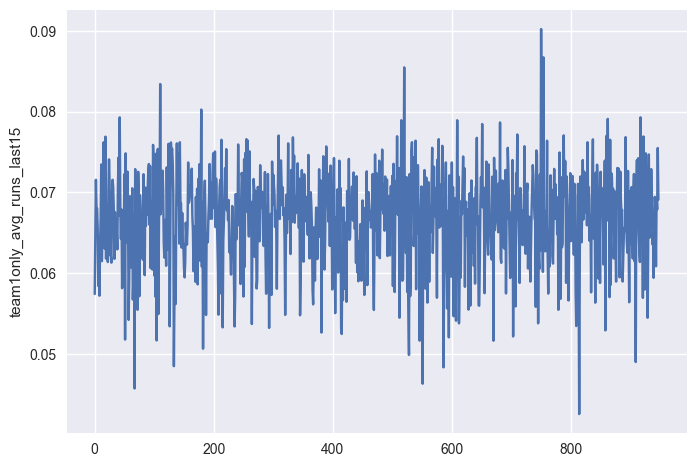

In [111]:
sns.lineplot(data=X['team1only_avg_runs_last15'])

<Axes: ylabel='team2only_avg_runs_last15'>

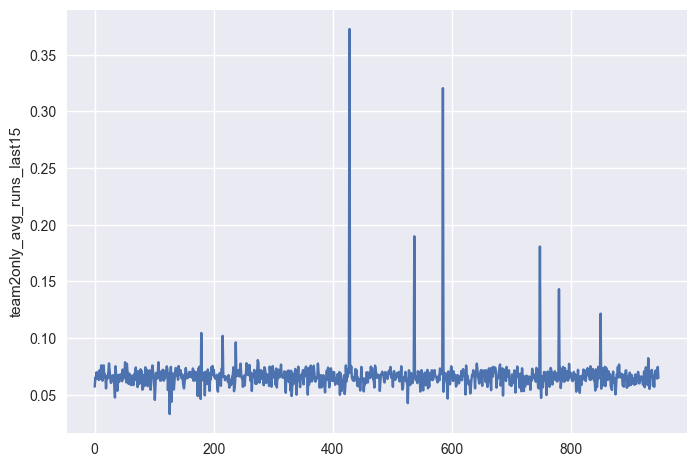

In [112]:
sns.lineplot(data=X['team2only_avg_runs_last15'])

<Axes: ylabel='ground_avg_runs_last15'>

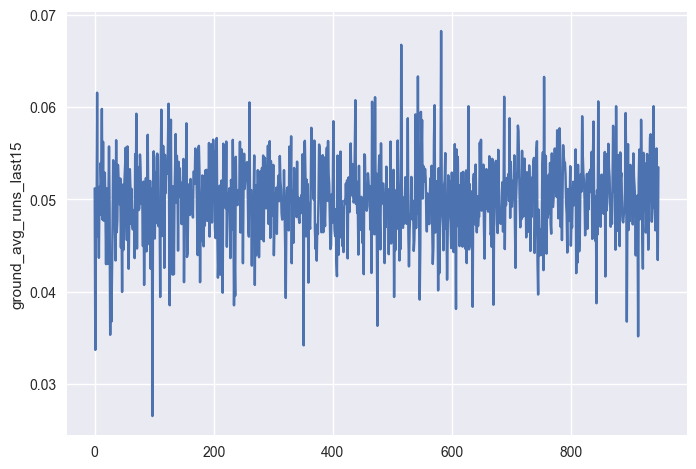

In [113]:
sns.lineplot(data=X['ground_avg_runs_last15'])

In [114]:
X.head()

,ground_avg_runs_last15,toss_winner_01,toss_decision_01,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team_avg_strike_rate,team_avg_economy,team2only_avg_runs_last15,team1_wickets_team2_last15,batting_total_team1_boundaries_team2_last15,bowling_total_team1_boundaries_team2_last15,nrr_team1_last5,nrr_team2_last5
0,0.051195,1.0,0.0,1.666667,0.672131,0.057406,1.668321,1.870867,0.057165,1.615385,1.586207,1.297297,-0.276257,1.368463
1,0.033711,1.0,0.0,1.285714,1.952381,0.064426,0.897611,0.843458,0.065110,0.813084,0.942966,0.896907,2.857333,-1.802958
2,0.048954,1.0,0.0,0.857143,0.672131,0.071557,0.927209,0.919736,0.063805,1.102564,0.943144,1.018265,-1.986808,1.683703
3,0.046984,0.0,1.0,2.166667,1.975610,0.067840,1.200898,0.780249,0.069841,0.810345,1.444444,0.787958,1.081908,-1.087892
4,0.061559,1.0,0.0,0.818182,1.327869,0.068006,1.399810,1.255469,0.067662,1.090000,0.990446,1.298893,1.643221,0.838380


## Model

#### GBM

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [116]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# user-defined parameters

algo_name = 'GradientBoostingClassifier'
is_ensemble = 'no'
n_trees = 6
depth = 2
lr = 0.3

##### Train

In [118]:
'''accuracy_gbm = []
n_trees_lst = list(range(5,65))
depth_lst = list(range(2,15))
lr_lst = [1, 0.1, 0.3, 0.01, 0.03]
nssgbm = []
depthssgbm = []
lrssgbm = []
for n_trees in n_trees_lst:
    for depth in depth_lst:
        for lr in lr_lst:
            clf_gbm = GradientBoostingClassifier(n_estimators = n_trees, max_depth = depth, learning_rate = lr)
            clf_gbm.fit(train_X,train_y)
            print('n_trees:',n_trees,'depth:',depth,'lr:',lr)
            nssgbm.append(n_trees)
            depthssgbm.append(depth)
            lrssgbm.append(lr)
            accuracy_gbm.append(accuracy_score(test_y, clf_gbm.predict(test_X)))
            print('booster:',booster,'lr:',lr,'depth:',depth,'child:',child)
            print(classification_report(test_y, clf_gbm.predict(test_X)))'''

"accuracy_gbm = []\nn_trees_lst = list(range(5,65))\ndepth_lst = list(range(2,15))\nlr_lst = [1, 0.1, 0.3, 0.01, 0.03]\nnssgbm = []\ndepthssgbm = []\nlrssgbm = []\nfor n_trees in n_trees_lst:\n    for depth in depth_lst:\n        for lr in lr_lst:\n            clf_gbm = GradientBoostingClassifier(n_estimators = n_trees, max_depth = depth, learning_rate = lr)\n            clf_gbm.fit(train_X,train_y)\n            print('n_trees:',n_trees,'depth:',depth,'lr:',lr)\n            nssgbm.append(n_trees)\n            depthssgbm.append(depth)\n            lrssgbm.append(lr)\n            accuracy_gbm.append(accuracy_score(test_y, clf_gbm.predict(test_X)))\n            print('booster:',booster,'lr:',lr,'depth:',depth,'child:',child)\n            print(classification_report(test_y, clf_gbm.predict(test_X)))"

In [119]:
clf_gbm = GradientBoostingClassifier(n_estimators = n_trees, max_depth = depth, learning_rate = lr)
clf_gbm.fit(train_X,train_y)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=6)

In [120]:
# Train accuracy
print(classification_report(train_y, clf_gbm.predict(train_X), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       369
           1       0.67      0.60      0.63       389

    accuracy                           0.64       758
   macro avg       0.64      0.64      0.64       758
weighted avg       0.64      0.64      0.64       758



In [121]:
print(classification_report(test_y, clf_gbm.predict(test_X), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66        99
           1       0.63      0.57      0.60        91

    accuracy                           0.63       190
   macro avg       0.63      0.63      0.63       190
weighted avg       0.63      0.63      0.63       190



In [122]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, clf_gbm.predict(test_X)))

0.631578947368421


In [123]:
'''max_ = max(accuracy_gbm)

for i in range(len(accuracy_gbm)):
    if accuracy_gbm[i]==max_:
        print('n_trees:',nssgbm[i])
        print('depth:',depthssgbm[i])
        print('lr:',lrssgbm[i])
        print('accuracy:',accuracy_gbm[i])'''

"max_ = max(accuracy_gbm)\n\nfor i in range(len(accuracy_gbm)):\n    if accuracy_gbm[i]==max_:\n        print('n_trees:',nssgbm[i])\n        print('depth:',depthssgbm[i])\n        print('lr:',lrssgbm[i])\n        print('accuracy:',accuracy_gbm[i])"

In [124]:
train_data['y_pred_01'] = clf_gbm.predict(X)
test_data['y_pred_01'] = clf_gbm.predict(X_test)

In [125]:
train_data['win_pred_score'] = clf_gbm.predict_proba(X)[:,1]
test_data['win_pred_score'] = clf_gbm.predict_proba(X_test)[:,1]

##### Getting win_pred_score corresponding to winner team

In [126]:
train_data['win_pred_score'] = np.where( (train_data['y_pred_01']==0), (1-train_data['win_pred_score']), train_data['win_pred_score'])
test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

##### Getting winner_team_id from custom dependent column

In [127]:
train_data['win_pred_team_id'] = np.where( (train_data['y_pred_01']==0), (train_data['team1_id']), train_data['team2_id'])
test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

#### Feature importance

In [128]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':clf_gbm.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(10)
df_feat_importance

,feat_name,model_feat_imp_train
0,nrr_team2_last5,0.230335
1,team1_wickets_team2_last15,0.155652
2,team_avg_strike_rate,0.151348
3,batting_total_team1_boundaries_team2_last15,0.131495
4,team_count_50runs_last15,0.089240
5,bowling_total_team1_boundaries_team2_last15,0.074452
6,nrr_team1_last5,0.048439
7,team1only_avg_runs_last15,0.041447
8,team_winp_last5,0.039182
9,ground_avg_runs_last15,0.038409


In [129]:
'''from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
boosters = ['gbtree','gblinear','dart']
lrs = [1, 0.1, 0.3, 0.01, 0.03]
depths = list(range(2,15))
boosterss = []
lrss = []
depthss = []


accuracy_xgb = []
# Initialize the XGBClassifier model
for booster in boosters:
    for lr in lrs:
        for depth in depths:
            xgbmodel = XGBClassifier(booster = booster, eta=lr, max_depth = depth)
            xgbmodel.fit(train_X, train_y)
            pred_y = xgbmodel.predict(test_X)
            accuracy_xgb.append(accuracy_score(test_y, pred_y))
            print('booster:',booster,'lr:',lr,'depth:',depth,'child:',child)
            boosterss.append(booster)
            lrss.append(lr)
            depthss.append(depth)
            print(classification_report(test_y, pred_y, labels=[0,1]))'''

"from xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\nboosters = ['gbtree','gblinear','dart']\nlrs = [1, 0.1, 0.3, 0.01, 0.03]\ndepths = list(range(2,15))\nboosterss = []\nlrss = []\ndepthss = []\n\n\naccuracy_xgb = []\n# Initialize the XGBClassifier model\nfor booster in boosters:\n    for lr in lrs:\n        for depth in depths:\n            xgbmodel = XGBClassifier(booster = booster, eta=lr, max_depth = depth)\n            xgbmodel.fit(train_X, train_y)\n            pred_y = xgbmodel.predict(test_X)\n            accuracy_xgb.append(accuracy_score(test_y, pred_y))\n            print('booster:',booster,'lr:',lr,'depth:',depth,'child:',child)\n            boosterss.append(booster)\n            lrss.append(lr)\n            depthss.append(depth)\n            print(classification_report(test_y, pred_y, labels=[0,1]))"

In [130]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier(booster = 'gbtree', eta=0.01, max_depth = 2)
xgbmodel.fit(train_X, train_y)
pred_y = xgbmodel.predict(test_X)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [131]:
print(classification_report(test_y, pred_y, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64        99
           1       0.60      0.57      0.59        91

    accuracy                           0.62       190
   macro avg       0.61      0.61      0.61       190
weighted avg       0.62      0.62      0.62       190



In [132]:
'''max_xgb = max(accuracy_xgb)

for i in range(len(accuracy_xgb)):
    if accuracy_xgb[i]==max_xgb:
        print('booster:',boosterss[i])
        print('depth:',depthss[i])
        print('lr:',lrss[i])
        print('accuracy:',accuracy_xgb[i])'''

"max_xgb = max(accuracy_xgb)\n\nfor i in range(len(accuracy_xgb)):\n    if accuracy_xgb[i]==max_xgb:\n        print('booster:',boosterss[i])\n        print('depth:',depthss[i])\n        print('lr:',lrss[i])\n        print('accuracy:',accuracy_xgb[i])"

In [153]:
import catboost
catmodel = catboost.CatBoostClassifier(iterations=42,
                                 learning_rate=0.05,
                                 depth=5,
                                 loss_function='Logloss',
                                 eval_metric='Accuracy',
                                 l2_leaf_reg=3)

catmodel.fit(train_X, train_y,
          eval_set=(test_X, test_y),
          verbose = 100,
          plot=True)

y_pred = catmodel.predict(test_X)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6147757	test: 0.6157895	best: 0.6157895 (0)	total: 3.24ms	remaining: 133ms
41:	learn: 0.7150396	test: 0.6526316	best: 0.6526316 (41)	total: 121ms	remaining: 0us

bestTest = 0.6526315789
bestIteration = 41



In [134]:
print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        99
           1       0.64      0.64      0.64        91

    accuracy                           0.65       190
   macro avg       0.65      0.65      0.65       190
weighted avg       0.65      0.65      0.65       190



In [135]:
import lightgbm as lgb
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
}

lgb_model = lgb.LGBMClassifier(**params)
lgb_model.fit(train_X, train_y)


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               metric='binary_logloss', objective='binary', verbose=-1)

In [136]:
print(classification_report(test_y, lgb_model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.51      0.46      0.49        99
           1       0.47      0.52      0.49        91

    accuracy                           0.49       190
   macro avg       0.49      0.49      0.49       190
weighted avg       0.49      0.49      0.49       190



## File preparation

#### File 1

In [137]:
#xgbmodel = XGBClassifier(booster = 'gbtree', eta=0.01, max_depth = 2)
#xgbmodel.fit(train_X, train_y)
#pred_y = xgbmodel.predict(test_X)

In [138]:
#print(classification_report(test_y, pred_y, labels=[0,1]))

In [139]:
catmodel.fit(X, y,
          eval_set=(test_X, test_y),
          verbose = 100,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6181435	test: 0.6578947	best: 0.6578947 (0)	total: 6.35ms	remaining: 311ms
49:	learn: 0.6729958	test: 0.7052632	best: 0.7052632 (34)	total: 221ms	remaining: 0us

bestTest = 0.7052631579
bestIteration = 34

Shrink model to first 35 iterations.


In [154]:
catmodel.fit(train_X, train_y,
          eval_set=(test_X, test_y),
          verbose = 100,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6147757	test: 0.6157895	best: 0.6157895 (0)	total: 2.21ms	remaining: 90.5ms
41:	learn: 0.7150396	test: 0.6526316	best: 0.6526316 (41)	total: 85.9ms	remaining: 0us

bestTest = 0.6526315789
bestIteration = 41



In [155]:
algo_name = 'CatBoostClassifier'

In [156]:
train_data['y_pred_01'] = catmodel.predict(X)
test_data['y_pred_01'] = catmodel.predict(X_test)
train_data['win_pred_score'] = catmodel.predict_proba(X)[:,1]
test_data['win_pred_score'] = catmodel.predict_proba(X_test)[:,1]

In [157]:
train_data['win_pred_score'] = np.where( (train_data['y_pred_01']==0), (1-train_data['win_pred_score']), train_data['win_pred_score'])
test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

In [158]:
train_data['win_pred_team_id'] = np.where( (train_data['y_pred_01']==0), (train_data['team1_id']), train_data['team2_id'])
test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

In [159]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':catmodel.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(10)
df_feat_importance

,feat_name,model_feat_imp_train
0,batting_total_team1_boundaries_team2_last15,13.297510
1,team1_wickets_team2_last15,10.919472
2,team2only_avg_runs_last15,10.506534
3,team_avg_strike_rate,9.907059
4,team1only_avg_runs_last15,9.218508
5,bowling_total_team1_boundaries_team2_last15,8.039408
6,team_winp_last5,7.751214
7,nrr_team2_last5,7.260520
8,ground_avg_runs_last15,6.263104
9,team_count_50runs_last15,6.048838


In [160]:
train_data['dataset_type'] = 'train'
test_data['dataset_type'] = 'r1'

In [161]:
## refactor

df_file1 = pd.concat([test_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     train_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan

df_file1['train_algorithm'] = algo_name
df_file1['is_ensemble'] = is_ensemble
df_file1['train_hps_trees'] = n_trees
df_file1['train_hps_depth'] = depth
df_file1['train_hps_lr'] = lr

In [162]:
df_file1.shape
df_file1.head()

(1219, 19)

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr
0,9250275,r1,90,0.593153,0.129032,0.000000,169.0,0.000000,NaN,0.017544,0.019608,-0.388033,NaN,0.000000,CatBoostClassifier,no,6,2,0.3
1,9262189,r1,36098,0.540278,0.942122,0.818182,168.8,0.615385,151.285714,0.877419,0.344262,0.066331,153.500,0.615385,CatBoostClassifier,no,6,2,0.3
2,9128776,r1,48334,0.501057,1.096154,1.110092,175.0,0.842105,171.066667,1.000000,0.753086,0.749646,179.625,0.842105,CatBoostClassifier,no,6,2,0.3
3,9586919,r1,36112,0.526270,0.665529,1.352941,167.0,0.285714,166.000000,0.996016,1.487805,0.141412,155.500,0.285714,CatBoostClassifier,no,6,2,0.3
4,9128538,r1,30414,0.574589,1.682403,1.113402,175.0,2.375000,169.933333,1.185874,0.310330,NaN,164.125,2.375000,CatBoostClassifier,no,6,2,0.3


#### File 2

In [163]:
feature_desc = {'team_count_50runs_last15':'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',\
               'team_winp_last5':'Ratio of team1\'s win % to team2\'s win % in last 5 games',\
               'ground_avg_runs_last15':'average runs scored in the ground in last 15 games',\
               'team1_winp_team2_last15':'Team1\'s win percentage against Team2 in last 15 games',\
               'team1only_avg_runs_last15':'team1\'s avg inning runs in last 15 games',\
                
               'season_num' : 'Numerical form of season. Takes 1 for oldest season and increases for latest seasons.',\
               'toss_winner_01' : 'Toss winner to numerical - 1 if team2 wins, else 0',\
               'toss_decision_01' : 'Toss decision - categorical - 1 if winner bats, 0 otherwise',\
                'team_avg_strike_rate': 'ratio of average strike rate of team 1 to team 2 in the last 15 games',\
               'team_avg_economy': 'ratio of average economy of team 1 to team 2 in the last 15 games',\
               'team2_only_avg_runs_last15': 'team2\'s avg inning runs in last 15 games',\
               'team1_wickets_team2_last15': 'ratio of wickets taken by team 1 to wickets taken by team 2 in the last 15 respective games',\
                'ground_team1_winp_team2_last5': 'Ratio of team1\'s win % to team2\'s win % in last 5 games on that ground',\
                'batting_total_team1_boundaries_team2_last15': 'Ratio of total batting boundaries (scored) of team 1 to team 2 in the last 15 games',\

                'bowling_total_team1_boundaries_team2_last15': 'Ratio of total bowling boundaries (conceded) of team 1 to team 2 in the last 15 games',\
'nrr_team1_last5': 'Avg net run rate of team 1 in last 5 games',\
'nrr_team2_last5': 'Avg net run rate of team 2 in last 5 games'}

In [164]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [165]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,batting_total_team1_boundaries_team2_last15,13.297510,1,Ratio of total batting boundaries (scored) of team 1 to team 2 in the last 15 games
2,team1_wickets_team2_last15,10.919472,2,ratio of wickets taken by team 1 to wickets taken by team 2 in the last 15 respective games
3,team2only_avg_runs_last15,10.506534,3,NaN
4,team_avg_strike_rate,9.907059,4,ratio of average strike rate of team 1 to team 2 in the last 15 games
5,team1only_avg_runs_last15,9.218508,5,team1's avg inning runs in last 15 games
6,bowling_total_team1_boundaries_team2_last15,8.039408,6,Ratio of total bowling boundaries (conceded) of team 1 to team 2 in the last 15 games
7,team_winp_last5,7.751214,7,Ratio of team1's win % to team2's win % in last 5 games
8,nrr_team2_last5,7.260520,8,Avg net run rate of team 2 in last 5 games
9,ground_avg_runs_last15,6.263104,9,average runs scored in the ground in last 15 games


## Save

In [166]:
df_file1.to_csv('file1.csv', index=False)
df_file2.to_csv('file2_.csv')